# Feature scoring
Featurescoring (poor man's alternative for sensitivity analysis) on the basecase ensemble (without any policies) and policycase
- Date: 11 July 2019
- M. Hupkens

In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring

C:\Users\markhupkens\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


## 1. Basecase

In [2]:
experiments, outcomes = load_results('C:/Users/markhupkens/EnergyTransitionModelling/Final notebooks/Results/20190715_experiments_energymodel_labour_base_ensempble.tar.gz')

In [3]:
outcomes.keys()

dict_keys(['TIME', 'total renovated houses', 'total renovated houses wcorp', 'total renovated houses koop', 'total renovated houses verhuur', 'total subsidy amount', 'total costs', 'total CO2 emission', 'total warmte via elek', 'total warmtenet', 'total woningen gas', 'total houses in model', 'prijseffect schaarste manuren transitie GASnrELEK NL', 'prijseffect schaarste manuren transitie GASnrWN NL', 'totaal benodigde manuren transitie GebOmg GASnrELEK NL corp', 'totaal benodigde manuren transitie GebOmg GASnrWN NL corp', 'tekort manuren transitie GebOmg GASnrELEK NL', 'tekort manuren transitie GebOmg GASnrWN NL', 'beschikbare manuren transitie woningen GASnrWN NL', 'beschikbare manuren transitie woningen GASnrELEK NL'])

In [4]:
keys_to_keep = ['total renovated houses',
                'total costs',
                'total CO2 emission']

new_outcomes = {key: outcomes[key] for key in keys_to_keep}

In [5]:
# Rename keys to match
new_outcomes['Cumulative renovated houses'] = new_outcomes.pop('total renovated houses') 
new_outcomes['Annual CO2 emission']  = new_outcomes.pop('total CO2 emission')
new_outcomes['Cumulative costs of renovation']  = new_outcomes.pop('total costs')

In [6]:
# Rename uncertainties
experiments.dtype.names=['Reduction carbon intensity power generation', 
                         'Reduction renovation costs',
                         'Fraction houses to district heat private sector high existing infrastructure',
                         'Fraction houses to district heat private sector low existing infrastructure',
                         'Fraction houses to district heat building corporations high existing infrastructure',
                         'Fraction houses to district heat building corporations low existing infrastructure',
                         'Fraction houses to district heat building corporations no existing infrastructure',
                         'Annual electricity demand growth',
                         'Annual development of new homes',
                         'policy time',
                         'renovation costs label group 1',
                         'renovation costs label group 2',
                         'renovation costs label group 3',
                         'renovation costs label group 4',
                         'Annual standard renovation rate',
                         'scenario_id',
                         'policy',
                         'model'
                         
                        ]

In [7]:
def remove_field_name(array, name):
    '''removes a dtype column from the uncertainties in the experiments'''
    names = list(array.dtype.names)
    if name in names:
        names.remove(name)
    b = array[names]
    return b

In [8]:
experiments = remove_field_name(experiments, 'policy')
experiments = remove_field_name(experiments, 'policy time')
experiments = remove_field_name(experiments, 'model')

In [9]:
x1 = experiments
y1 = new_outcomes

fs1 = feature_scoring.get_feature_scores_all(x1,y1)

C:\Users\markhupkens\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\markhupkens\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


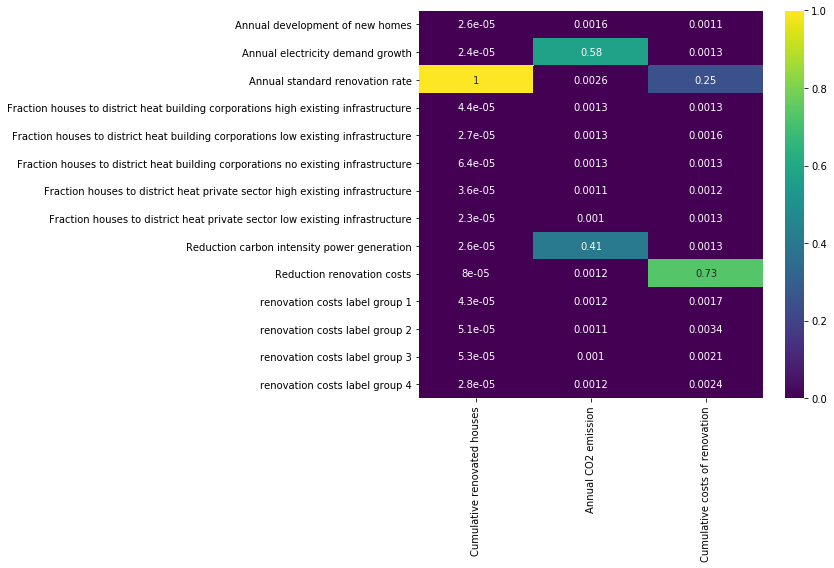

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

base = sns.heatmap(fs1, cmap='viridis', annot=True)
base.set_xticklabels(base.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.savefig('C:/Users/markhupkens/Dropbox/Thesis/EMA/PLOTS/Feature_Scoring_Basecase.png', dpi=300, bbox_inches='tight')

plt.show()


## 2. Policy

In [11]:
experiments2, outcomes2 = load_results('C:/Users/markhupkens/Dropbox/Thesis/FINAL/Final results/20190726_experiments_policies_v2_100.tar.gz')

In [12]:
outcomes2.keys()

dict_keys(['TIME', 'total cumulative subsidies awarded', 'total subsidy awarded annually', 'total renovated houses', 'total renovated houses wcorp', 'total renovated houses koop', 'total renovated houses verhuur', 'total costs', 'total CO2 emission', 'total warmte via elek', 'total warmtenet', 'total woningen gas', 'total houses in model', 'prijseffect schaarste manuren transitie GASnrELEK NL', 'prijseffect schaarste manuren transitie GASnrWN NL', 'totaal benodigde manuren transitie GebOmg GASnrELEK NL corp', 'totaal benodigde manuren transitie GebOmg GASnrWN NL corp', 'tekort manuren transitie GebOmg GASnrELEK NL', 'tekort manuren transitie GebOmg GASnrWN NL', 'beschikbare manuren transitie woningen GASnrWN NL', 'beschikbare manuren transitie woningen GASnrELEK NL'])

In [13]:
keys_to_keep = ['total renovated houses',
                'total cumulative subsidies awarded',
                'total costs',
                'total CO2 emission']

new_outcomes2 = {key: outcomes2[key] for key in keys_to_keep}

In [14]:
# Rename uncertainties
experiments2.dtype.names=['Reduction carbon intensity power generation', 
                         'Reduction renovation costs',
                         'Fraction houses to district heat private sector high existing infrastructure',
                         'Fraction houses to district heat private sector low existing infrastructure',
                         'Fraction houses to district heat building corporations high existing infrastructure',
                         'Fraction houses to district heat building corporations low existing infrastructure',
                         'Fraction houses to district heat building corporations no existing infrastructure',
                         'Subsidy percentage cut-off level high building value',
                         'Subsidy percentage cut-off level low building value',
                         'Subsidy percentage cut-off level lower middle building value',
                         'Subsidy percentage cut-off level upper middle building value',                         
                         'Annual electricity demand growth',
                         'Annual development of new homes',
                         'Renovation rate improvement after 2030',
                         'renovation costs label group 1',
                         'renovation costs label group 2',
                         'renovation costs label group 3',
                         'renovation costs label group 4',
                         'Annual standard renovation rate',
                         'scenario_id',
                         'policy',
                         'model'
                        ]

In [15]:
experiments2 = remove_field_name(experiments2, 'model')

In [16]:
x2 = experiments2
y2 = new_outcomes2

fs = feature_scoring.get_feature_scores_all(x2,y2)

C:\Users\markhupkens\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\markhupkens\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\markhupkens\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silenc

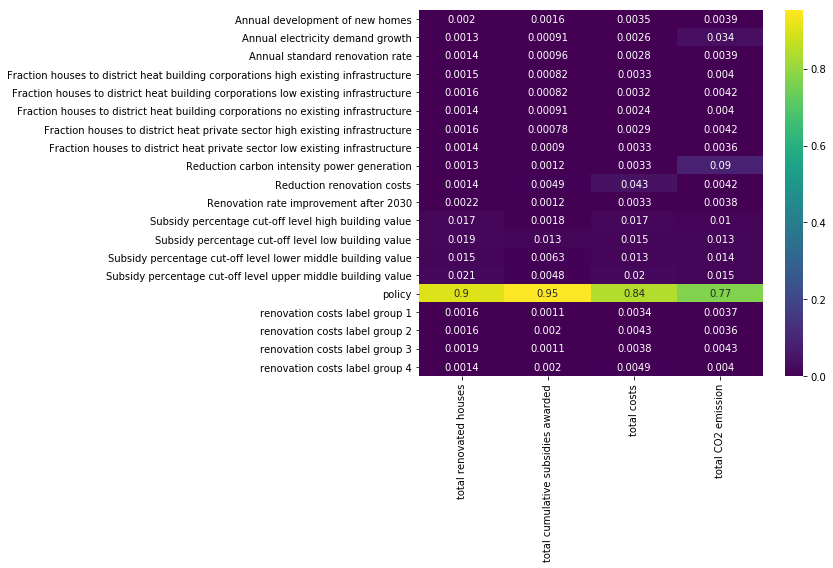

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(fs, cmap='viridis', annot=True)
plt.tight_layout()
plt.savefig('C:/Users/markhupkens/Dropbox/Thesis/EMA/Feature_Scoring_Policies.png', dpi=300, bbox_inches='tight')

plt.show()